In [5]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import pyroomacoustics as pra
from scipy.io import wavfile
from scipy.io import savemat
import IPython

In [2]:
fs, audio_anechoic = wavfile.read('notebooks_arctic_a0010.wav')
IPython.display.display(IPython.display.Audio(audio_anechoic, rate=fs))

## 2D ROOM SIMULATION

/home/manav/.local/lib/python3.6/site-packages/pyroomacoustics/room.py:1049: UserWarning: Using absorption parameter is deprecated. In the future, use materials instead.
  "Using absorption parameter is deprecated. In the future, use materials instead."


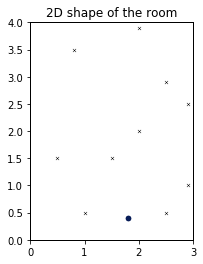

In [3]:
pol = np.array([[0,0], [0,4], [3,4], [3,0]]).T
room = pra.Room.from_corners(pol, fs=16000, max_order=0, absorption=1)

# Adding the source
room.add_source(np.array([1.8, 0.4]), signal=audio_anechoic)

# Adding the microphone
mic_locs = np.c_[
    [2.5, 2.9],
    [2.0, 2.0],
    [1.5, 1.5],
    [1.0, 0.5],
    [2.5, 0.5],
    [2.9, 1.0],
    [0.5, 1.5],
    [0.8, 3.5],
    [2.9, 2.5],
    [2.0, 3.9]
]
room.add_microphone_array(pra.MicrophoneArray(mic_locs, room.fs))

room.plot()
plt.title("2D shape of the room")
plt.show()

In [4]:
def get_rir(size='medium', absorption='medium', order = 0):

    
    if absorption=='high':
        absor = 0.9
    elif absorption=='medium':
        absor = 0.3
    elif absorption=='low':
        absor = 0.1
    else:
        raise ValueError("The absorption parameter can only take values ['low', 'medium', 'high']")
    
    if size=='large':
        size_coef = 5.
    elif size=='medium':
        size_coef = 2.5
    elif size=='small':
        size_coef = 1.
    else:
        raise ValueError("The size parameter can only take values ['small', 'medium', 'large']")
        
        
    pol = size_coef * np.array([[0,0], [0,4], [3,4], [3,0]]).T
    room = pra.Room.from_corners(pol, fs=16000, max_order=order, absorption=absor)

    # Create the 3D room by extruding the 2D by a specific height
    room.extrude(size_coef * 2.5, absorption=absor)

    # Adding the source
    room.add_source(size_coef * np.array([1.8, 0.4, 1.6]), signal=audio_anechoic)

    # Adding the microphone
    R = size_coef * np.array([[2.5,2.9,0.5], 
                              [2.0, 2.0, 0.8], 
                              [1.5, 1.5, 1.0], 
                              [1.0, 0.5, 0.6], 
                              [2.5, 0.5, 1.0],
                              [2.9, 1.0, 1.2],
                              [0.5, 1.5, 1.0],
                              [0.8, 3.5, 1.5],
                              [2.9, 2.5, 1.0],
                              [2.0, 3.9, 1.6]])
    R = np.transpose(R)
    room.add_microphone_array(pra.MicrophoneArray(R, room.fs))

    # Compute the RIR
    room.compute_rir()
    
    print(room.rir)

    # Plot and apply the RIR on the audio file
    #room.plot_rir()
    #plt.show()
    room.simulate()
    room.mic_array.to_wav('aaa.wav', norm=True, bitdepth=np.int16)
    
    # Display the audio file
    fs_result, result = wavfile.read('aaa.wav')
    #IPython.display.display(IPython.display.Audio(result, rate=fs_result))
    
    return room.rir

In [8]:
rir_small = get_rir(size='large', absorption='low', order = 2)

rir_small = np.asarray(rir_small)
print(rir_small.shape)

savemat('rir.mat', {"array": rir_small})

[[array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       1.07997052e-07, 0.00000000e+00, 0.00000000e+00])], [array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       1.59807217e-07, 0.00000000e+00, 0.00000000e+00])], [array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       1.23718849e-07, 0.00000000e+00, 0.00000000e+00])], [array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       1.91327752e-07, 0.00000000e+00, 0.00000000e+00])], [array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       4.02252225e-08, 0.00000000e+00, 0.00000000e+00])], [array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       1.81214857e-07, 0.00000000e+00, 0.00000000e+00])], [array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       1.97821789e-07, 0.00000000e+00, 0.00000000e+00])], [array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       1.66228747e-07, 0.00000000e+00, 0.00000000e+00])], [array([0.00000000e+00, 0.00000000e+00, 0.00000

In [22]:
rir_small = np.asarray(rir_small)
print(rir_small)

[[array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       1.07997052e-07, 0.00000000e+00, 0.00000000e+00])
  array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 8.0081496e-08,
       0.0000000e+00, 0.0000000e+00])
  array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       8.74658297e-08, 0.00000000e+00, 0.00000000e+00])
  array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       1.28918865e-07, 0.00000000e+00, 0.00000000e+00])]
 [array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       1.59807217e-07, 0.00000000e+00, 0.00000000e+00])
  array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       2.19383661e-09, 0.00000000e+00, 0.00000000e+00])
  array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       1.02803628e-08, 0.00000000e+00, 0.00000000e+00])
  array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       1.23362134e-08, 0.00000000e+00, 0.00000000e+00])]
 [array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...

In [24]:
print(rir_small.shape)

(10, 4)


In [25]:
np.save('rir_small.npy', rir_small)

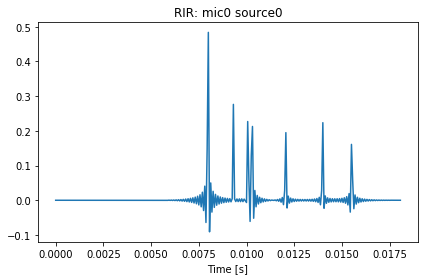

In [13]:
get_rir(size = 'small', absorption = 'low', order = 1)

[[array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,

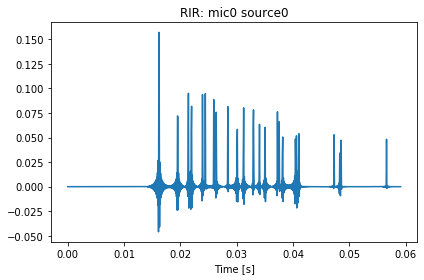

In [29]:
rir_medium = get_rir(size='medium', absorption='low', order = 2)

In [30]:
rir_medium = np.asarray(rir_medium)
np.save('rir_medium.npy', rir_medium)

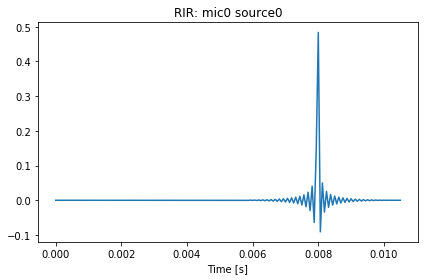

In [15]:
get_rir(size='small', absorption='high')

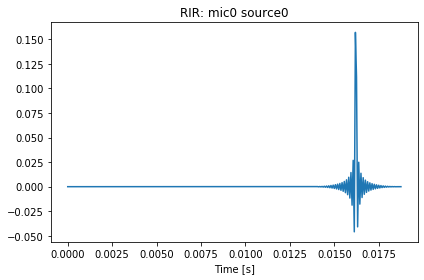

In [16]:
get_rir(size='medium', absorption='low')

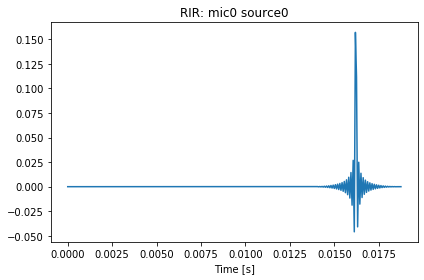

In [17]:
get_rir(size='medium', absorption='medium')

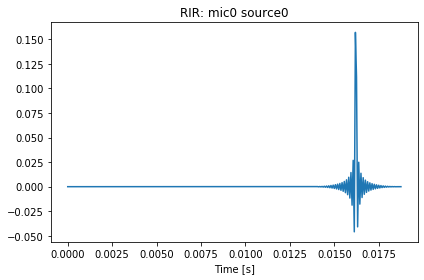

In [18]:
get_rir(size='medium', absorption='high')

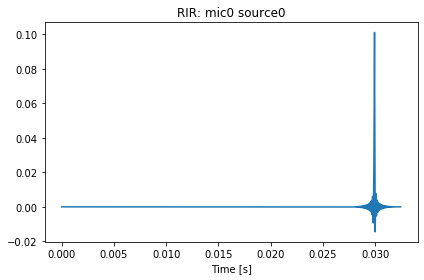

In [19]:
get_rir(size='large', absorption='low')

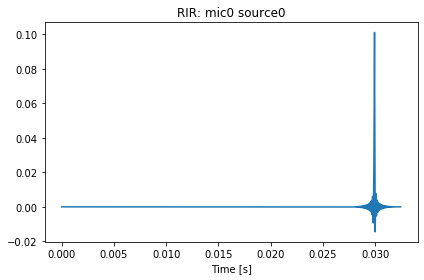

In [20]:
get_rir(size='large', absorption='medium')

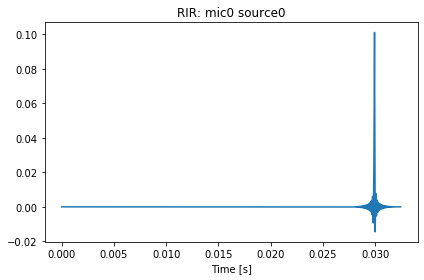

In [21]:
get_rir(size='large', absorption='high')